In [1]:
from __future__ import division

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("PlasticbasedTextilesinclothingindustry.csv")
data

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
0,Zara,Polyester,2020,5000,20,7500,1200,300,500000
1,Zara,Nylon,2019,3000,15,5000,900,200,450000
2,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000
3,Zara,Cotton,2018,2000,10,4500,800,180,550000
4,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000
...,...,...,...,...,...,...,...,...,...
6951,Adidas,Tencel,2018,3218,21,7536,902,192,523173
6952,Urban Outfitters,Microfiber,2019,2622,11,5267,952,170,436096
6953,Urban Outfitters,Organic_Cotton,2019,5920,24,4321,982,177,489765
6954,Adidas,Microfiber,2020,2897,16,4125,1085,321,487443


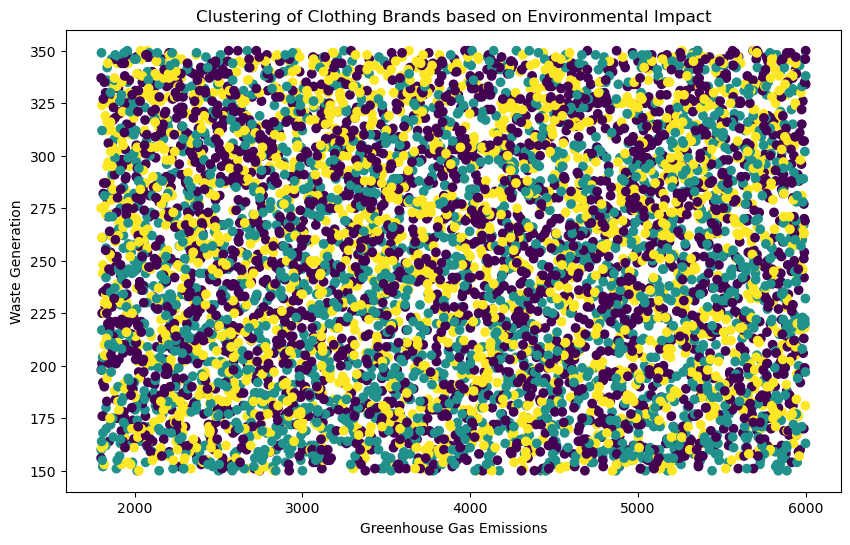

('Clustering_Result.csv',
 array([[-0.01092563,  0.07387116,  0.01856686,  1.02285294,  0.07045902],
        [ 0.02606437, -0.95433928, -0.032794  , -0.60078032, -0.15240609],
        [-0.01297835,  0.89293555,  0.01015568, -0.68832781,  0.06746913]]))

In [4]:
features = ['Greenhouse_Gas_Emissions', 'Pollutants_Emitted', 'Water_Consumption', 'Energy_Consumption', 'Waste_Generation']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Display cluster centers
cluster_centers = kmeans.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Greenhouse_Gas_Emissions'], data['Waste_Generation'], c=clusters, cmap='viridis')
plt.xlabel('Greenhouse Gas Emissions')
plt.ylabel('Waste Generation')
plt.title('Clustering of Clothing Brands based on Environmental Impact')
plt.show()

# Save the resulting dataset with cluster labels
output_file_path = 'Clustering_Result.csv'
data.to_csv(output_file_path, index=False)

output_file_path, cluster_centers